# Implementace domácího úkolu - rybí regrese 

In [151]:
import pandas as pd

__ = 0

- Načtete si data pomocí pandas, vyberte požadované sloupce, převeďte vše na číselné hodnoty. 

*(Bude se vám hodit [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), která kategoriální hodnoty zakóduje pomocí OneHotEncoding (pomocí nul a jedniček). (Pozn. **dummies** proto, že nám přibudou pomocné proměnné (sloupce), které se označují jako **dummy variables**.)*

In [152]:
fish_data = pd.read_csv("fish_data.csv", index_col=0)
fish_data = fish_data.drop(columns=["ID"])
fish_data = pd.get_dummies(fish_data)
fish_data

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,9.8,11.4,12.0,13.2,2.2044,1.1484,0,0,0,0,0,1,0
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0


- Zvol si sloupec, který budeš používat jako odezvu (**Weight**). Do proměnné **X** ulož sloupce, které budeš používat jako příznaky, do proměnné **y** sloupec s odezvou.

*V teorii strojového učení se vstupy modelu (příznaky, vstupní proměnné) typicky označují písmenem X a výstupy písmenem y. Řada programátorů toto používá i k označování proměnných v kódu. X představuje matici (neboli tabulku), kde každý řádek odpovídá jednomu datovému vzorku a každý sloupec jednomu příznaku (vstupní proměnné). y je vektor, neboli jeden sloupec s odezvou.*

*Na vyzobnutí odezvy se výborně hodí metoda  [pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html).*


In [153]:
y = fish_data.pop("Weight")
X = fish_data

- Rozděl data na trénovací a testovací. Všimni si, že máme v datech různé druhy ryb, na co si dát pozor? 

*Metoda  [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split)  nám data rozdělí náhodně na trénovací a testovací sadu. Velikost testovací množiny můžeme specifikovat parametrem test_size, jeho defaultní hodnota je 0.25, t. j. 25%.*

In [154]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

- Vyber si několik regresních modelů a zkus je použít. 

Pro dnešek možno zkusit:

  - [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 
 
  - [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
      + hyperparametry: 
          * alpha, float, default=1.0 
 
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)        
     + hyperparametry:
          * kernel, default rbf, one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
          * C, float, optional (default=1.0)

# Odbočka: co jsou to ty *hyper-parametry*? 

U příkladů s černými krabičkami v první hodině jsme si (za vašima zády) několikrát trochu pomohli a 
krabičce jsme předali na začátku nějaké parametry. Krabička totiž často umožňuje uživateli, aby si ji nakonfiguroval. V terminologii krabiček si můžeme představit, že krabička má na sobě různé páčky, kterými se dá seřídit. Těmito páčkami se nastavují tzv. **hyper-parametry** modelu. Všechny modely, které najdeš v knihovně Scikit-learn, mají nějaké defaultní nastavení a půjdou použít i bez toho, aby ses nastavením těchto hyper-parametrů zabývala.
V případě, že model nedává uspokojivý výsledek, můžeš zkusit tyto parametry upravit, např. vyzkoušet několik různých nastavení a porovnat hodnotu metriky na testovací množině.

U seznamu výše máme některé hyperparametry uvedené. Parametry často souvisejí s regularizací (výše *alpha*, *C*). **Regularizace** znamená, že model kromě toho, že se snaží nafitovat tak, abý odpovídal datům (dával správné odpovědi), zohledňuje nějaké další kriterium. Typicky toto kritérium hlídá, aby výstup modelu moc neosciloval, apod. Podobně jako jsi v příkladu s krajinou říkala, že řešení volíš tak, aby bylo *plynulé*, *hezké*, *odpovídalo obvyklým* krajinám. 

Proces výběru modelu včetně jeho parametrů se nazývá **model selection**, v knihovně Scikit-learn najdeš nástroje, které ti mohou pomoci pod heslem [Model selection](https://scikit-learn.org/stable/model_selection.html).

In [155]:
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor  
from sklearn.svm import SVR 

In [156]:
model_zoo = [ 
    (LinearRegression, {}),
    (Lasso, {"alpha": 1.0}),
    (Lasso, {"alpha": 0.5}), 
    (SVR, {"kernel": "rbf"}),
    (SVR, {"kernel": "poly"})
]

+ K trénovaní (fitování) slouží metoda `fit`, k predikci pro nové vzory metoda `predict`. 
```
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
```

+ Metriku nemusíš programovat, k dispozici máš `mean_absolute_error`, `mean_squared_error` a `r2_score`.
```
  metrika = mean_absolute_error(y_test, pred)
```  

In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def ml_game(X_train, y_train, X_test, y_test,
            model_class, parametry):
    """ 1. Vytvoří vybraný model s danými parametry.
        2. Natrénuje jej na trénovací množině.
        3. Spočte hodnoty metrik na trénovací i testovací množině.
        returns seznam dvojic (hodnota metriky na X_train, hodnota metriky na X_test)
    """ 
    model = model_class(**parametry)
    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f"MAE {mean_absolute_error(y_train, y_pred_train):.3f} {mean_absolute_error(y_test, y_pred_test):.3f}", 
          end=" "*10)
    print(f"MSE {mean_squared_error(y_train, y_pred_train):.3f} {mean_squared_error(y_test, y_pred_test):.3f}")
    print()
    
    return model 

In [158]:
trained_models = []
for classname, parametry in model_zoo: 
    model = ml_game(X_train, y_train, X_test, y_test, classname, parametry)
    trained_models.append(model) 

MAE 60.542 66.927          MSE 6412.754 9287.426

MAE 60.801 74.728          MSE 6791.526 11682.064

MAE 60.318 71.358          MSE 6668.554 10958.297

MAE 245.434 315.802          MSE 107786.672 184838.811

MAE 142.704 165.020          MSE 37874.416 45267.138



/home/petra/datacourse_env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54549.84029204288, tolerance: 911.331110848837
  positive)
/home/petra/datacourse_env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162723.41928041758, tolerance: 911.331110848837
  positive)


Naučili jsme několik modelů. Zamysli se teď na chvilku, který by sis vybrala a proč. 
Označme si jej jako `best_model`.  Můžeš si i zkusit pohrát s hyperparametry a zvolit jiné nastavení.

In [159]:
# doplň pořadí modelu, který jsi vybrala

best_model = trained_models[__]

# A pozor, překvapení ...  další testovací množina

Data jsme si rozdělili na trénovací a testovací. Trénovací jsme použili na učení modelu. 
**Ale pozor!** Testovací množinu jsme použili k výběru modelu. Metrika na testovací množině nám tedy 
nedává nezávislý odhad toho, jak se bude náš model chovat na neznámých datech. Byl totiž vybrán tak, 
aby dával dobré výsledky na testovací množině. 

Testovací množina nám slouží jako odhad generalizačních schopností modelu. Neměla by ale být použita ani při učení,
ani při výběru modelu. Část, kterou si oddělíme na "testování" pro účely výběru modelu, nazýváme správně 
**evaluační** množina. 

A teď přichází opravdová testovací data, načtěte je ze souboru `fish_data_test.csv`.

In [162]:
test_data = pd.read_csv("fish_data_test.csv", index_col=0)
test_data = pd.get_dummies(test_data.drop(columns=["ID"]))

y_real_test = test_data.pop("Weight")
X_real_test = test_data 

y_pred_test = best_model.predict(X_real_test)

print(f"MAE {mean_absolute_error(y_real_test, y_pred_test):.3f}")
print(f"MSE {mean_squared_error(y_real_test, y_pred_test):.3f}")


MAE 75.243
MSE 11784.165


In [168]:
for weight, predicted_weight in zip(y_real_test, y_pred_test):
    print(f"{weight:>10.1f}     {predicted_weight:>10.1f}")

     650.0          608.5
     620.0          683.9
     680.0          732.9
     700.0          726.1
     920.0          890.0
      69.0           10.1
     120.0           60.4
       0.0           85.0
     150.0          139.6
     160.0          141.7
     169.0          262.2
     161.0          189.5
     272.0          380.1
     306.0          382.2
    1000.0          824.9
      90.0           23.9
     150.0          138.0
     140.0          162.7
     500.0          516.4
       5.9         -404.6
      32.0         -194.2
     100.0           16.3
     115.0          130.9
     110.0          162.0
     170.0          210.1
     188.0          254.6
     180.0          253.2
     250.0          350.5
     300.0          364.9
     320.0          439.1
     700.0          736.8
    1000.0         1029.7
    1000.0         1005.6
     950.0          945.3
    1650.0         1416.9
      19.7          120.9


# Visualizace na závěr 

+ Pro představu si zobrazme závislost váhy ryby na délce Length3. Zobrazíme zvlášt pro různé druhy, tedy např. pro Pike a Roach.  

In [163]:
is_pike = X["Species_Pike"] == 1 
pike = X[is_pike]["Length3"]
pike_weights = y[is_pike]
predicted_pike_weights = trained_models[0].predict(X[is_pike])

is_roach = X["Species_Roach"] == 1
roach = X[is_roach]["Length3"]
roach_weights = y[is_roach]
predicted_roach_weights = trained_models[0].predict(X[is_roach])

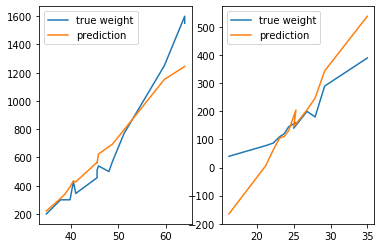

In [164]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 2)

ax[0].plot(pike, pike_weights, label="true weight");
ax[0].plot(pike, predicted_pike_weights, label="prediction");
ax[0].legend()

ax[1].plot(roach, roach_weights, label="true weight");
ax[1].plot(roach, predicted_roach_weights, label="prediction");
ax[1].legend()